<a href="https://colab.research.google.com/github/sruthidamera/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

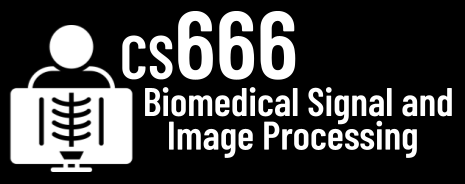

# Assignment 1

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [37]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [38]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [39]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [40]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [41]:
SAMPLING_RATE = metadata['sampling_rate']
DATA_POINTS=len(signal)
SECONDS = DATA_POINTS / SAMPLING_RATE
print('sampling data :', SAMPLING_RATE)
print('seconds :', SECONDS)

sampling data : 1000.0
seconds : 15.0


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [42]:
from  biosppy.signals import ecg
ecg_result = ecg.ecg(signal=signal, sampling_rate=1000, show=False)

In [43]:
len(ecg_result)

7

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [44]:
import matplotlib.pyplot as plt
import numpy as np

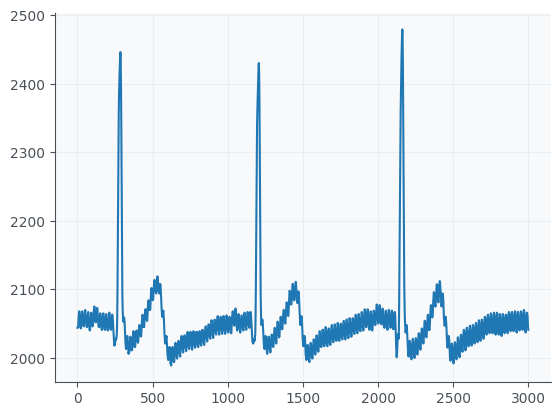

In [45]:
first_three_seconds_unfiltered = signal[0:3*int(SAMPLING_RATE)]
plt.plot(first_three_seconds_unfiltered)

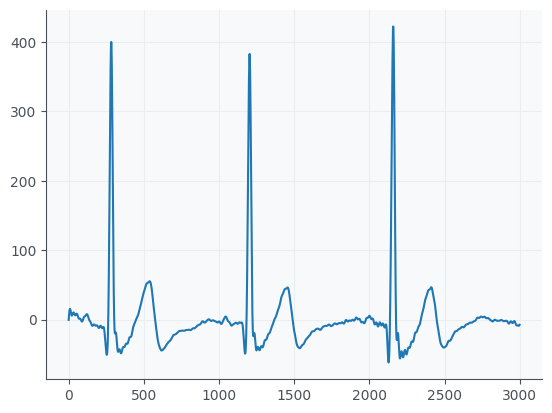

In [46]:
first_three_seconds_filtered=ecg_result['filtered'][0:3*int(SAMPLING_RATE)]
plt.plot(first_three_seconds_filtered)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

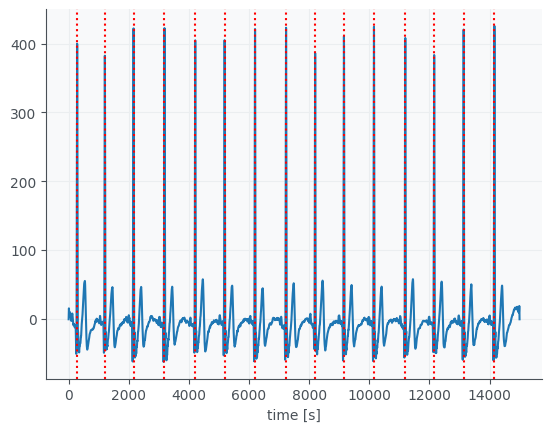

In [47]:
from matplotlib import pylab
plot(ecg_result['filtered'])
pylab.xlabel('time [s]')
for i in ecg_result['rpeaks']:
  plt.axvline(x = i, color = 'r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [48]:
!pip install neurokit2
import neurokit2 as nk

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

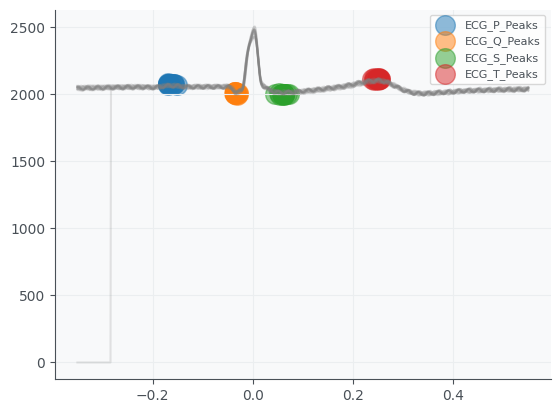

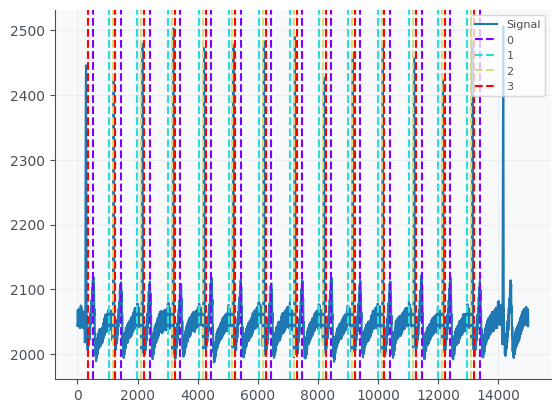

In [49]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

x, waves_peak = nk.ecg_delineate(signal, ecg_result['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak",show=True,show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

In [50]:
# TODO Does the detection work well?
# YES

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [51]:
pip install sleepecg

In [52]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
from sleepecg import detect_heartbeats
rpeaks = detect_heartbeats(signal, fs=SAMPLING_RATE)
result = ' '.join(map(str, rpeaks))
print('rpeaks : '+result)

rpeaks : 283 1203 2158 3188 4211 5188 6200 7232 8200 9157 10155 11198 12159 13139 14162


In [53]:
print('Detection of rpeaks using Biosppy : ' + ' '.join(map(str, ecg_result['rpeaks'])))
print('Detection of rpeaks using sleepecg : ' + ' '.join(map(str, rpeaks)))

Detection of rpeaks using Biosppy : 283 1204 2159 3188 4211 5188 6200 7232 8200 9157 10156 11198 12159 13139 14162
Detection of rpeaks using sleepecg : 283 1203 2158 3188 4211 5188 6200 7232 8200 9157 10155 11198 12159 13139 14162


In [54]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!

import numpy as np
rpeaks_Biosppy=np.array(ecg_result['rpeaks'])
rpeaks_sleepecg=np.array(rpeaks)

# Calculate Mean Squared Error (MSE)
mse = np.mean((rpeaks_Biosppy - rpeaks_sleepecg) ** 2)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

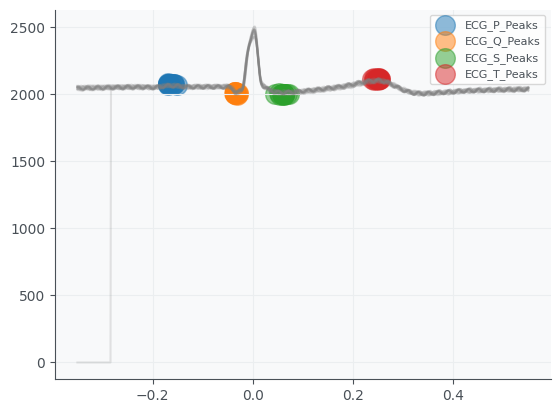

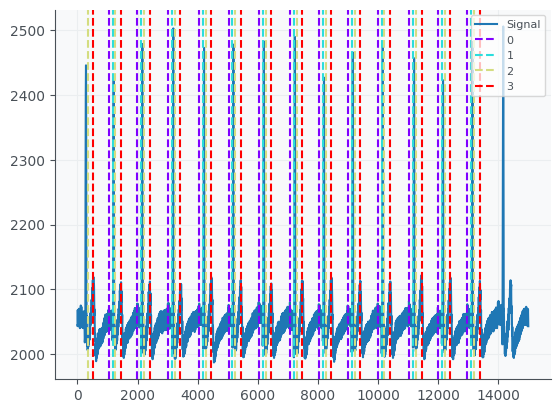

In [55]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
x, waves_peak = nk.ecg_delineate(signal, ecg_result['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak",show=True,show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], signal)


In [56]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filtered_signal = nk.signal_filter(ecg_result['filtered'], lowcut=0.5, highcut=40, sampling_rate=SAMPLING_RATE)


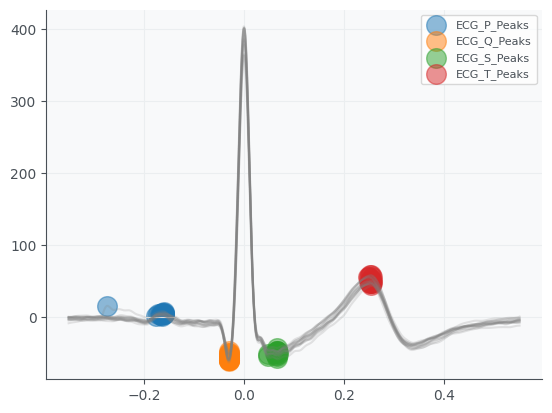

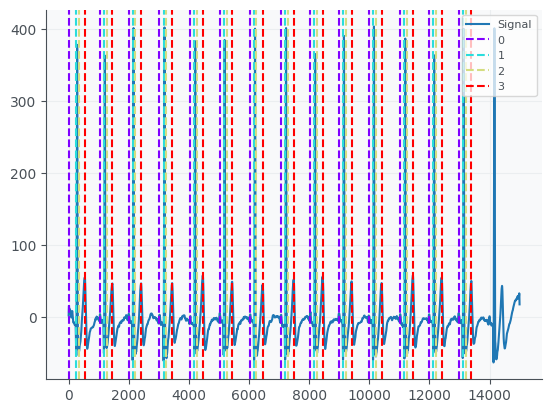

In [57]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(filtered_signal, ecg_result['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], filtered_signal)

In [58]:
# TODO Which one works the best?
#Filtering the ECG signal makes it easier to spot peaks. The filtered signal from biosppy is clearer for peak detection compared to the unfiltered signal.

In [59]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#